# Data Engineering Capstone Project- Data Architecture Design and  Transition to AWS


## Introduction
The goal of this project is to solve a business problem. We will design the data architecture for a small private clinic. 

This is a fictional healthcare clinic.

* Name: UnicornHealth
* Scope: Local
* Patients: 500
* Employees: 25
* Kind of practice: Family Practice 

In order to do design the data architecture, we need to understand the problem. After this, we will design a business process diagram to visualize the business model. Then, we will look at all relevant data and finally, we will understand how all the data relates. We will transition the business to a cloud environment to automize the data process.

Lets visualize the basic business model:

We used <a href="https://www.lucidchart.com/">lucidchart</a> to make the business model diagram</a>.

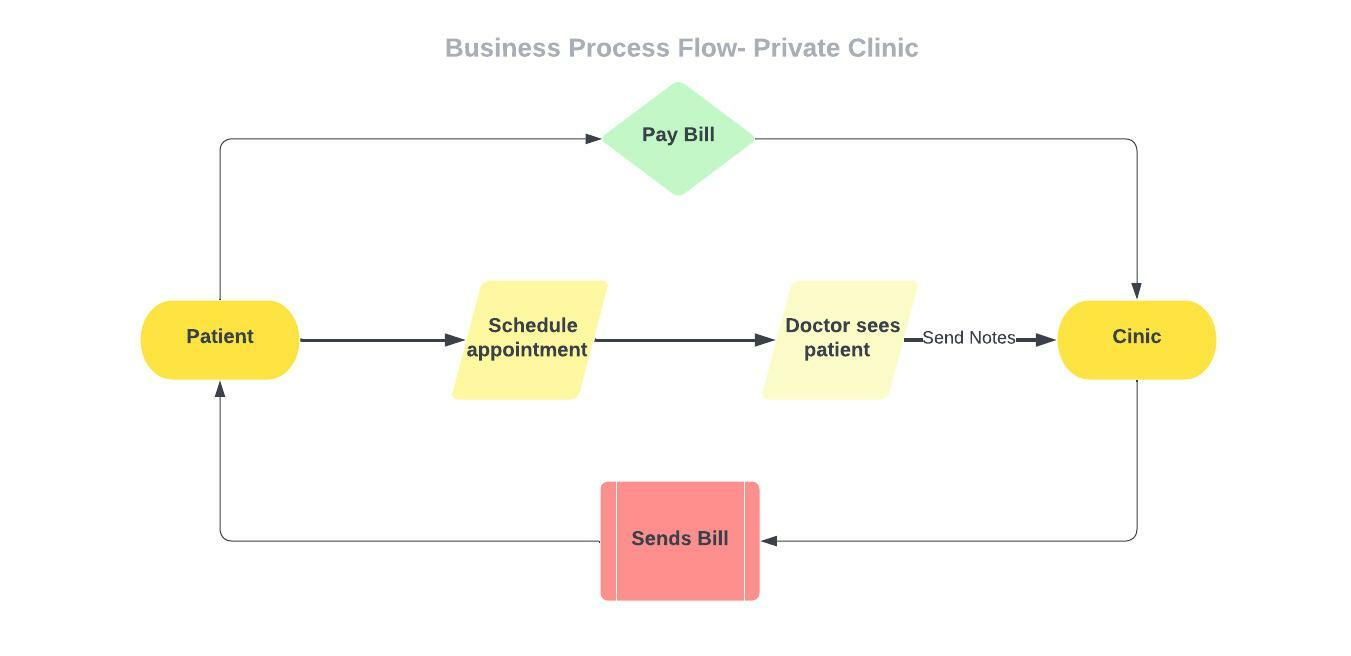


### Schematic Presentation of Data Structure

The business model diagram, helped with the visualization of the basic business process of UnicornHealth. Next, we will determine the basic Data Structure by identifying the main elements, which are <b>patient</b>, <b>appointment</b>, <b>encounter</b>, <b>account</b>, <b>insurance</b>and <b>employee</b> . We also generated mock data related to billing and insurance . The attributes for each element are being also identified.  Finally, we will proceed to identify the connections between the entities.

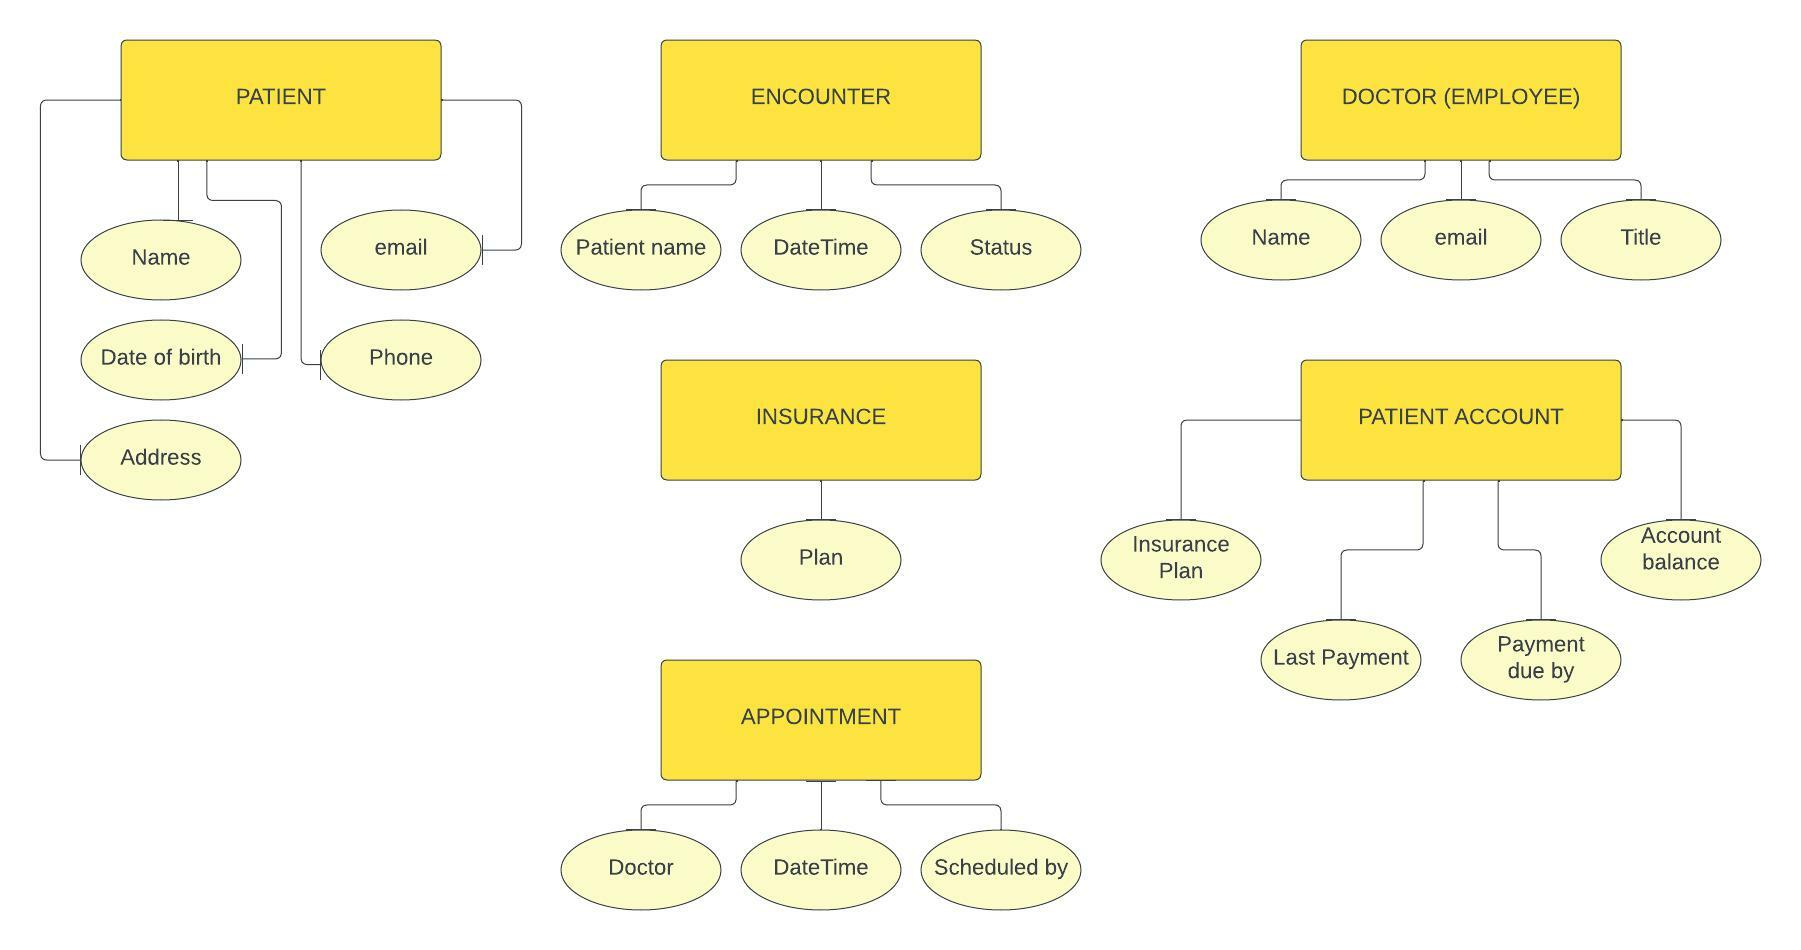



## DATA CREATION PROCESS

### Database creation
We used a <a href ="https://www.mockaroo.com/"> mock data generator</a> to generate fake but realistic data. Open <a href ="https://github.com/AleOrcutt/DE-CapstoneProject-UnicornHealth/blob/cc9a792fb3eef2f2769fa33d27740198f9f4228a/MockTableCreation.pdf">this file</a> to get an idea of the conditions we established to generate the data.

We loaded CSV files directly into our test environment which in our case was MySql Workbench.

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/account%20(3).csv">account.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/7cbff859b75f6ff43d449cc0c9e06a7b6a751d44/employee.csv">employee.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/appointment.csv">appointment.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/encounter%20(1).csv">encounter.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/insurance.csv">insurance.csv file</a>

<a href ="https://github.com/AleOrcutt/UnicornHealth/blob/65fffd57217f267270da1e0e0b6d7e936d601bf3/paient500.csv">patient.csv file</a>


### Determination of foreign and primary keys 

We assigned the first column of each table as a primary key. Each table has a primary key, which is unique in the dataset.

The foreign and primary keys (unique keys) are primary keays that appear in other tables. We used MySQL workbench which automatically identifues the foreign keys.


### Data Definition Language (DDL)

We especified the storage groups to be used. We defined the data, primary keys and foreign keys in Mysql Workbench.

CREATE DATABASE `unicornhealth` /*!40100 DEFAULT CHARACTER SET utf8mb4 COLLATE utf8mb4_0900_ai_ci */ /*!80016 DEFAULT ENCRYPTION='N' */;

CREATE TABLE `account` (
  `accountId` varchar(12) NOT NULL,
  `member_id` varchar(25) DEFAULT NULL,
  `last_payment` decimal(10,0) DEFAULT NULL,
  `payment_due` varchar(20) DEFAULT NULL,
  `account_balance` varchar(20) DEFAULT NULL,
  PRIMARY KEY (`accountId`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `appointment` (
  `appId` varchar(12) NOT NULL,
  `physician` varchar(25) DEFAULT NULL,
  `app_date` varchar(10) DEFAULT NULL,
  `app_time` varchar(10) DEFAULT NULL,
  `scheduled_by` varchar(20) DEFAULT NULL,
  PRIMARY KEY (`appId`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `employee` (
  `employee_id` varchar(15) NOT NULL,
  `first_name` varchar(20) DEFAULT NULL,
  `last_name` varchar(20) DEFAULT NULL,
  `email` varchar(40) DEFAULT NULL,
  `phone_number` varchar(12) DEFAULT NULL,
  `title` varchar(20) DEFAULT NULL,
  PRIMARY KEY (`employee_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `encounter` (
  `encounter_id` varchar(12) NOT NULL,
  `patient` varchar(25) DEFAULT NULL,
  `start_time` varchar(15) DEFAULT NULL,
  `status` varchar(15) DEFAULT NULL,
  PRIMARY KEY (`encounter_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `insurance` (
  `insid` varchar(30) NOT NULL,
  `plan` varchar(30) DEFAULT NULL,
  PRIMARY KEY (`insid`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `patient` (
  `person_id` varchar(12) NOT NULL,
  `first_name` varchar(20) DEFAULT NULL,
  `last_name` varchar(20) DEFAULT NULL,
  `email` varchar(45) DEFAULT NULL,
  `dob` varchar(10) DEFAULT NULL,
  `address` varchar(30) DEFAULT NULL,
  `zip` varchar(5) DEFAULT NULL,
  `insurance` varchar(20) DEFAULT NULL,
  PRIMARY KEY (`person_id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

###  Enhanced entity-relationship (EER)

This model is helpful as a tool to plan the database and visualize the relationships among the tables.

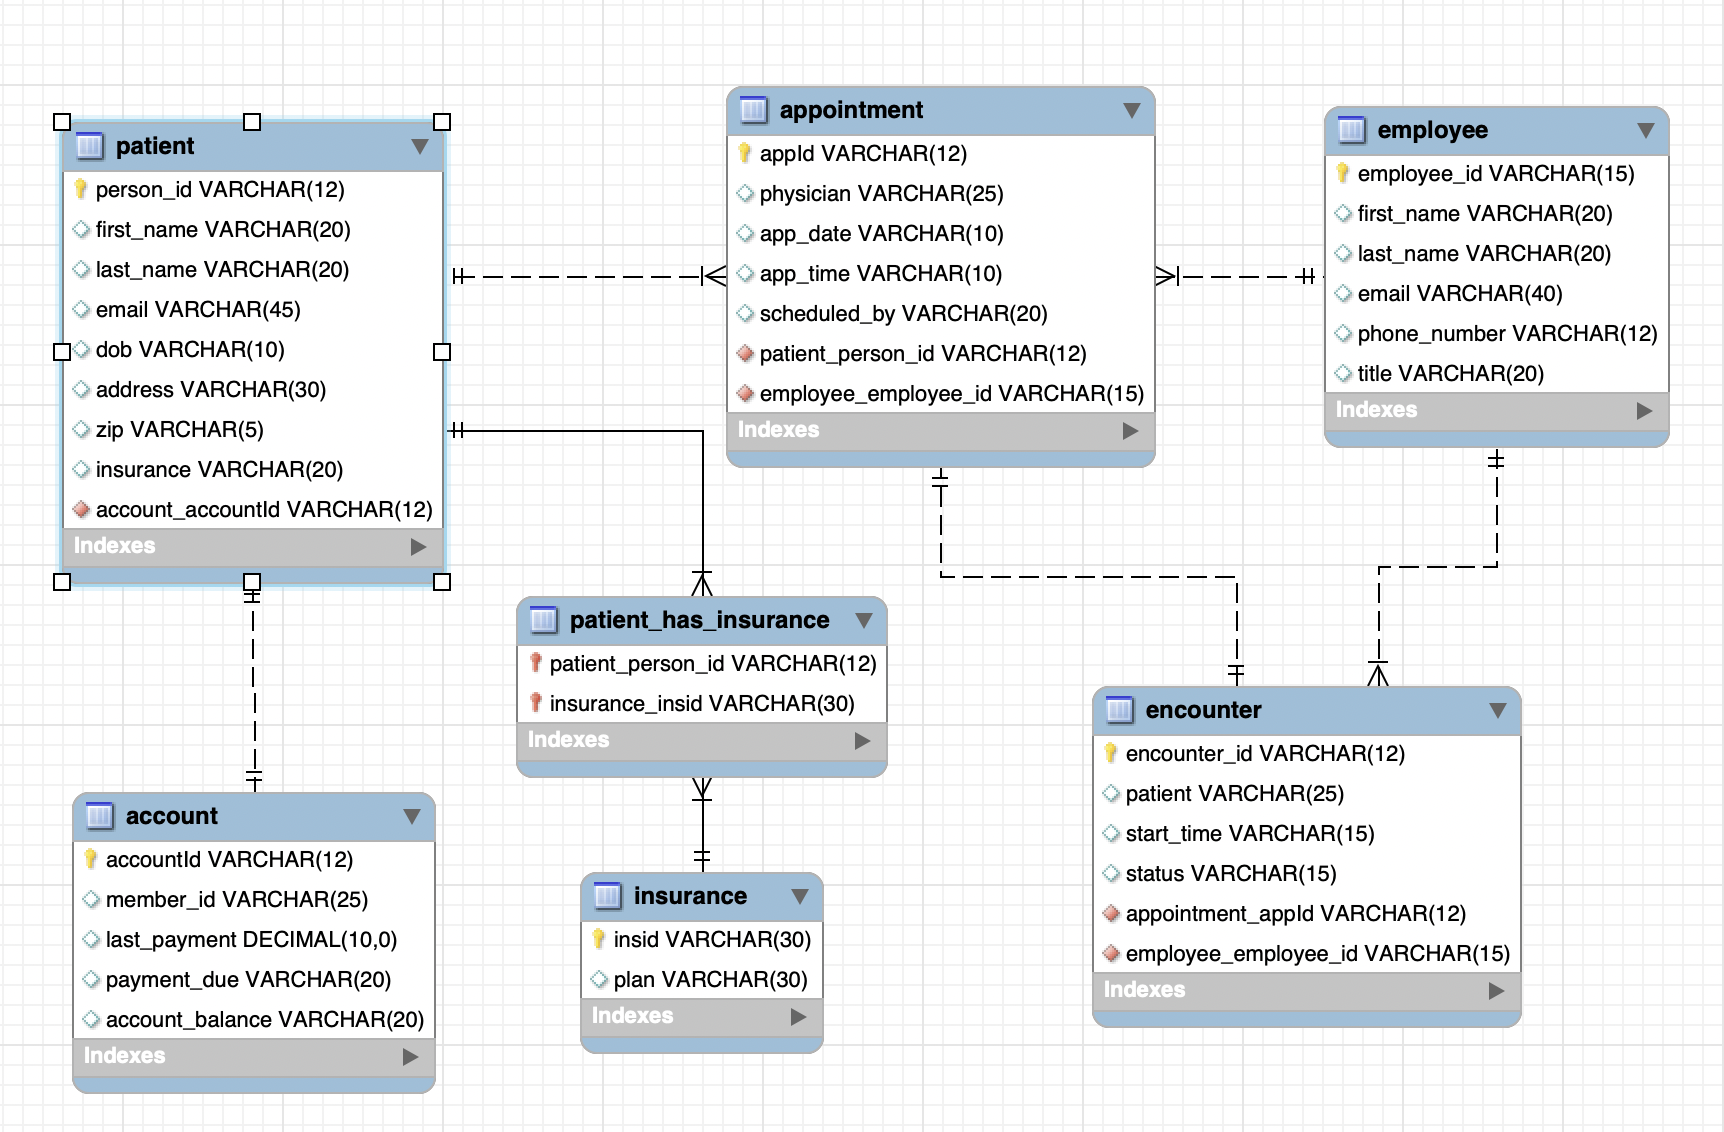

## Amazon Web Services (AWS) Architecture

This is a visual guide to help us understand the flow of the data, as well as the microservices used.

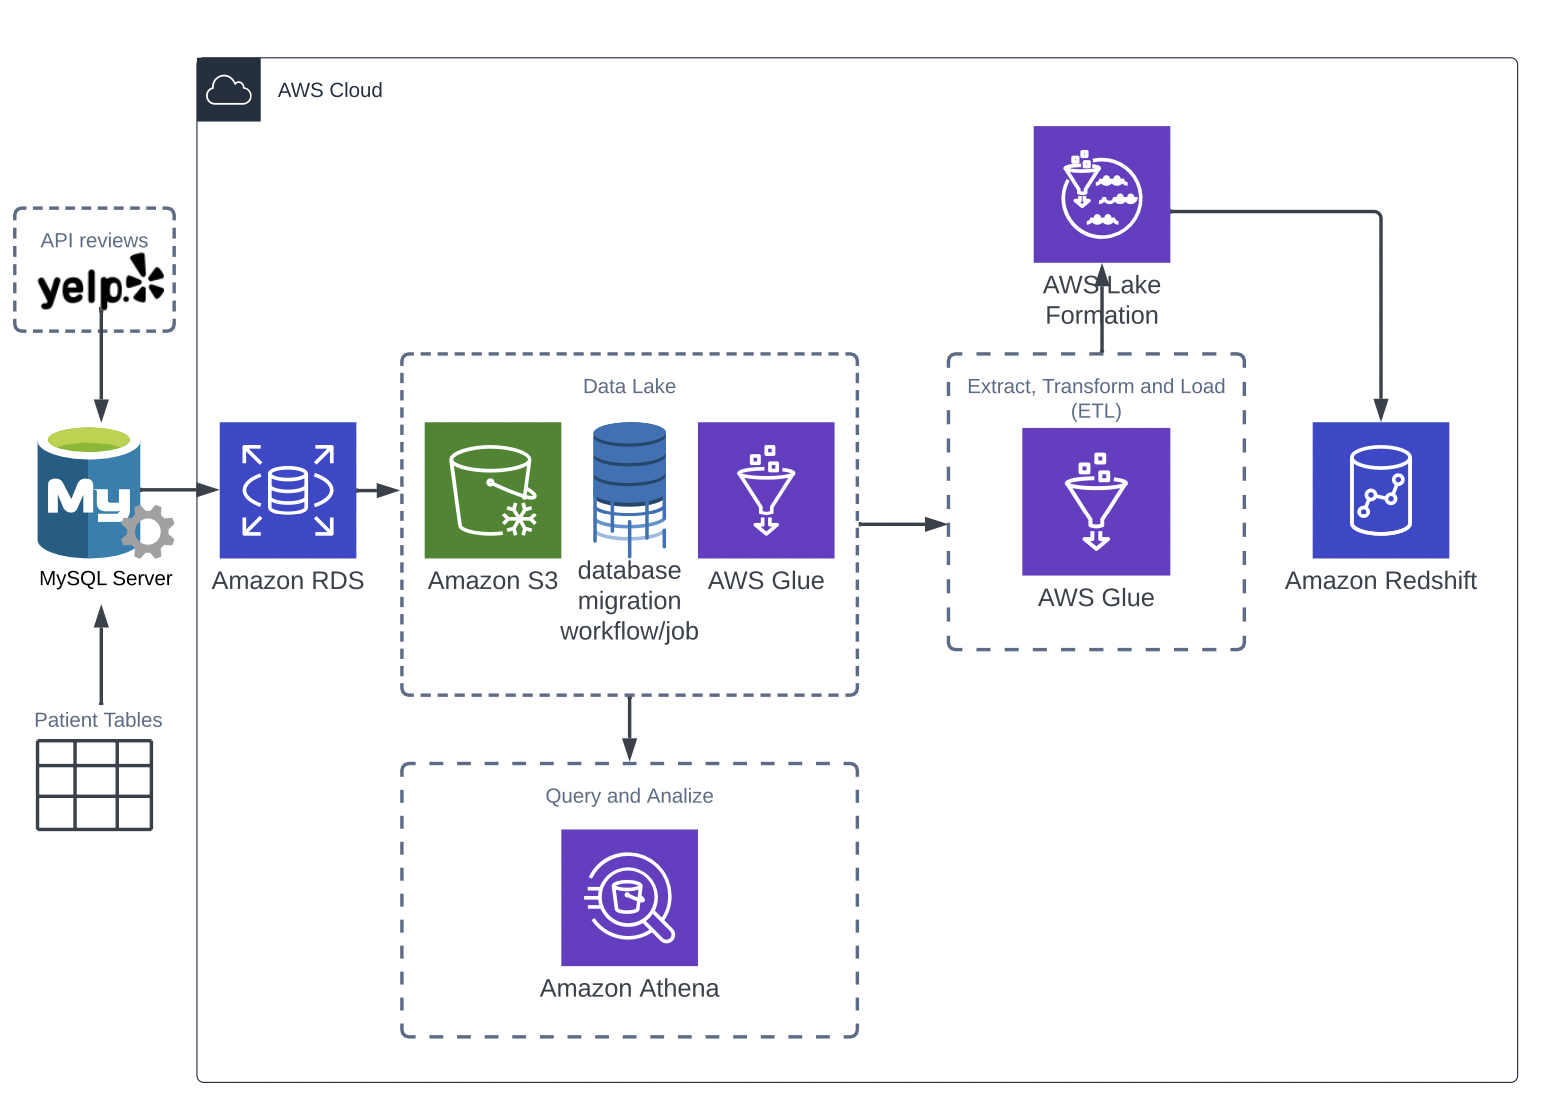



## Database Migration from Client Server to AWS RDS

To migrate the database to AWS RDS we needed to, first create a database using Easy Create, MySQL, Free Tier engine in RDS.




Second, we went to MySQL workbench to establish a connection from local port to the endpoint of the AWS RDS database we just created

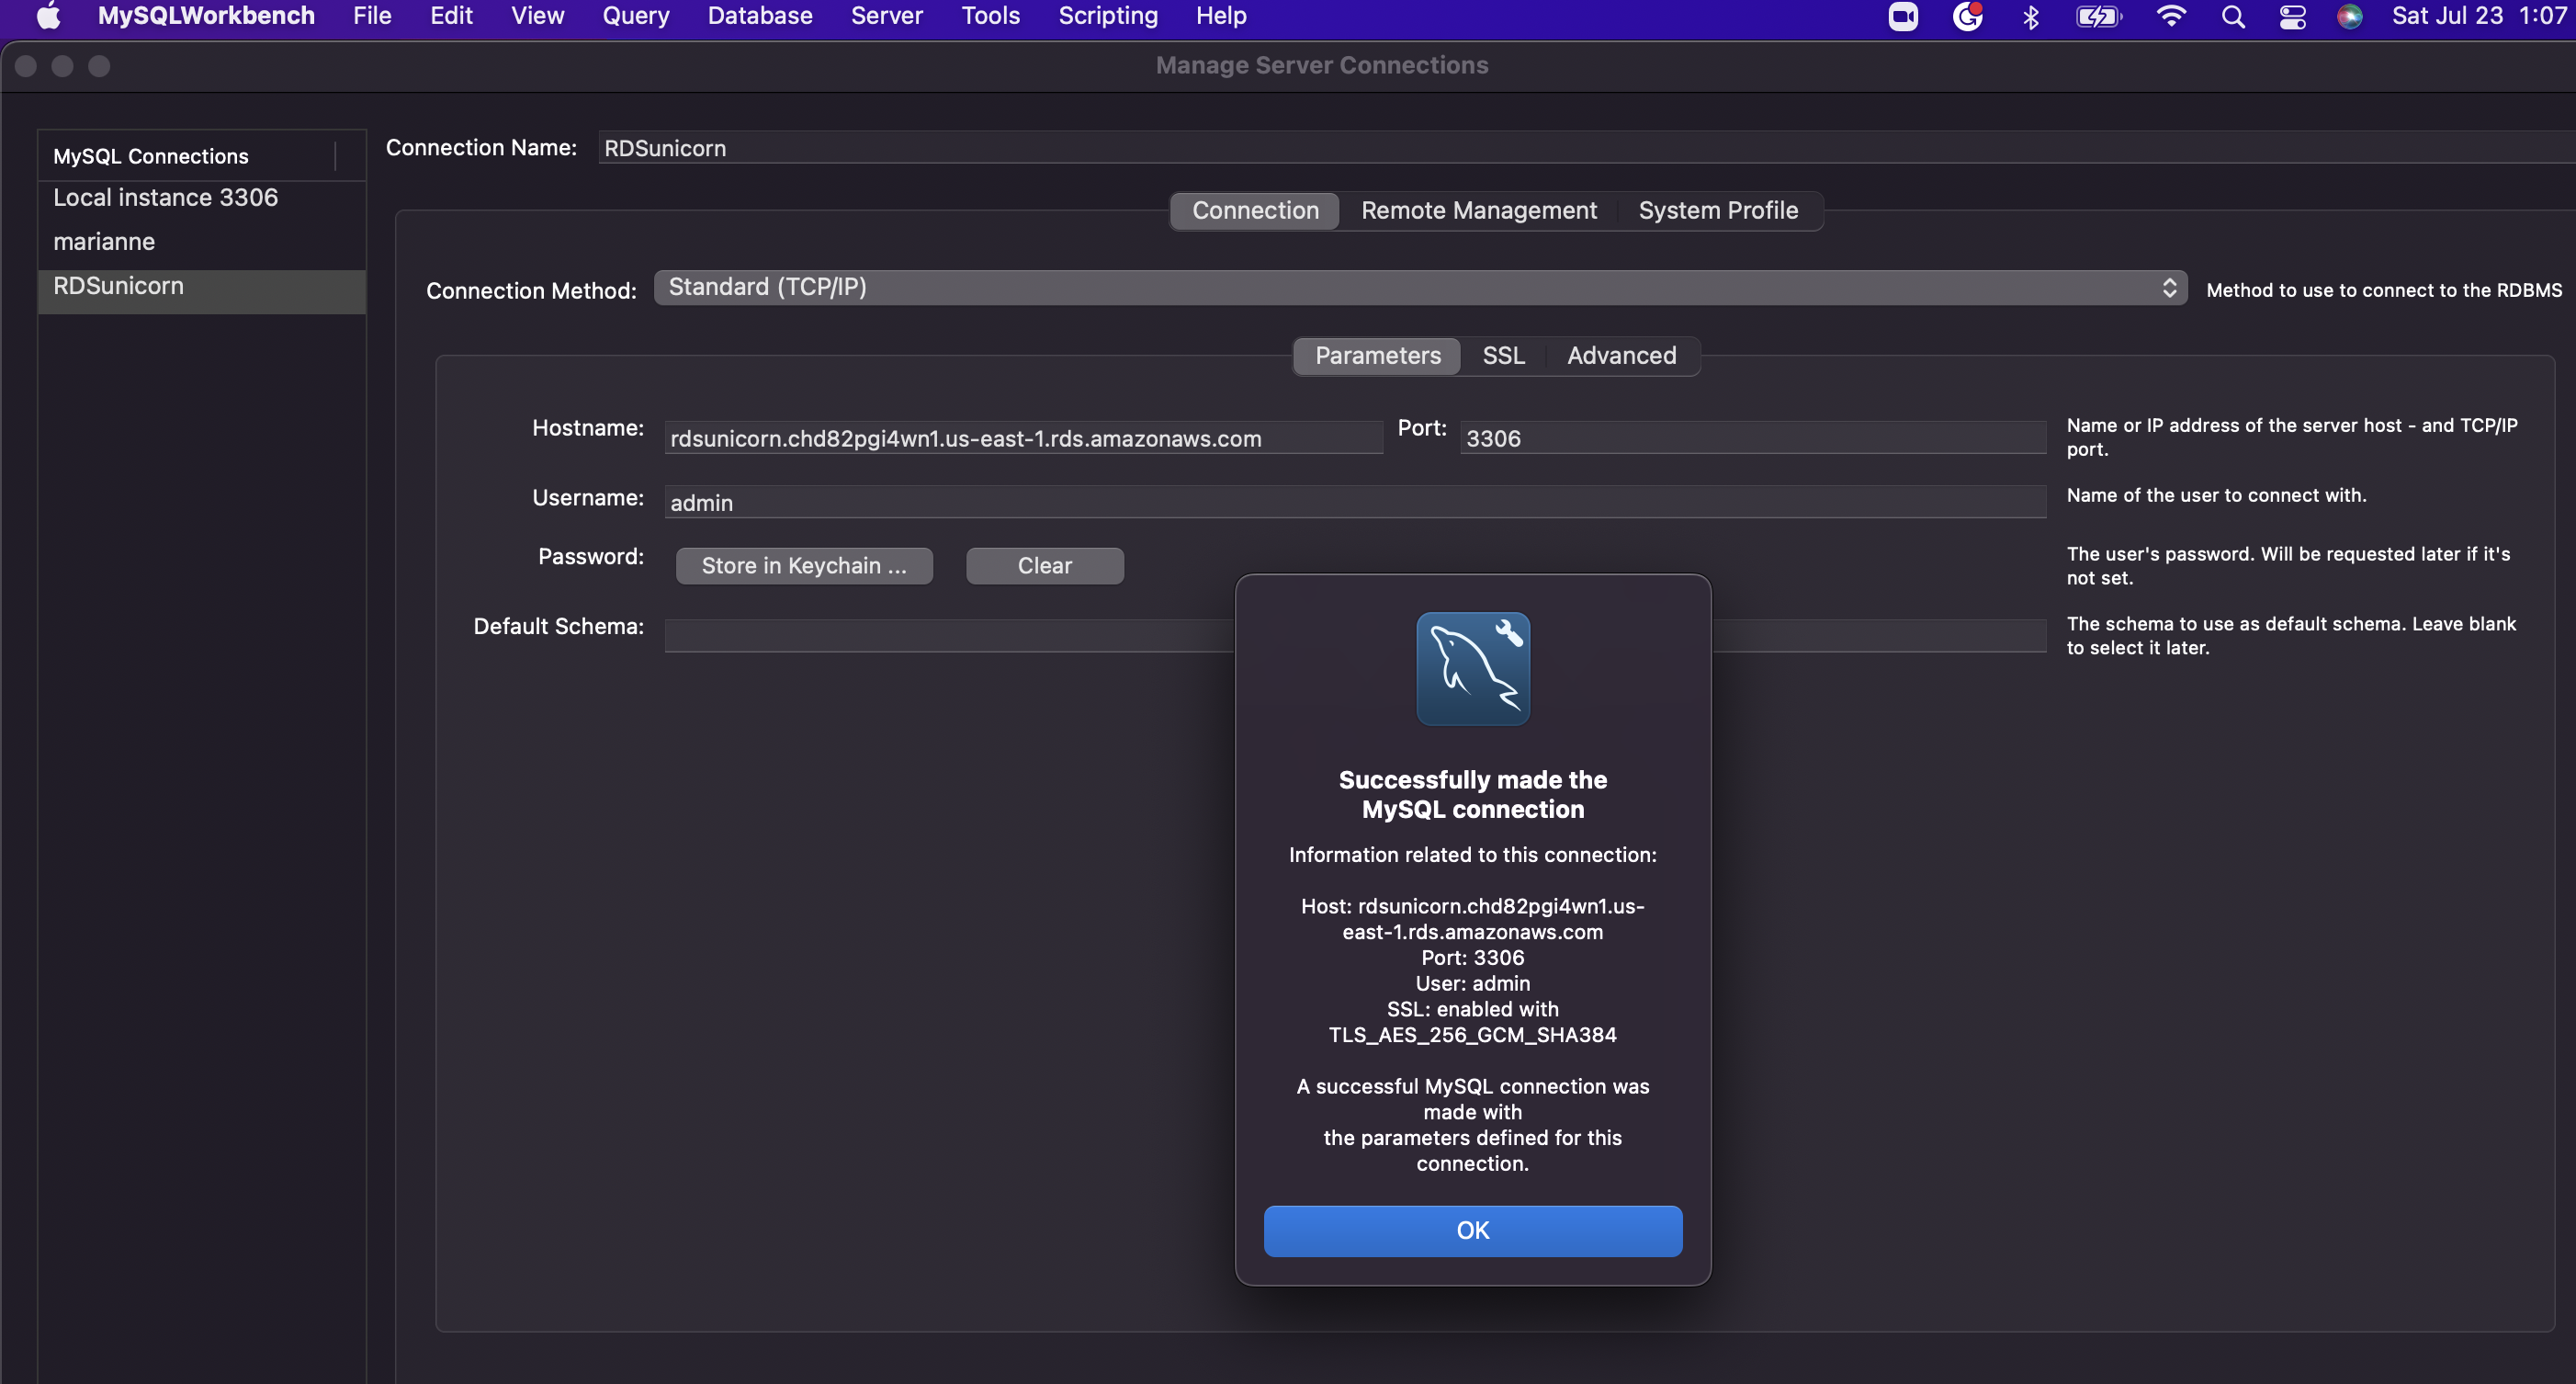

Third, we tested the connection, and it failed the first time. It was necessary to alter the inbound rules to the Security Group in our database AWS RDS to allow traffic from MySQL/Aurora port 3306 as shown in the image below

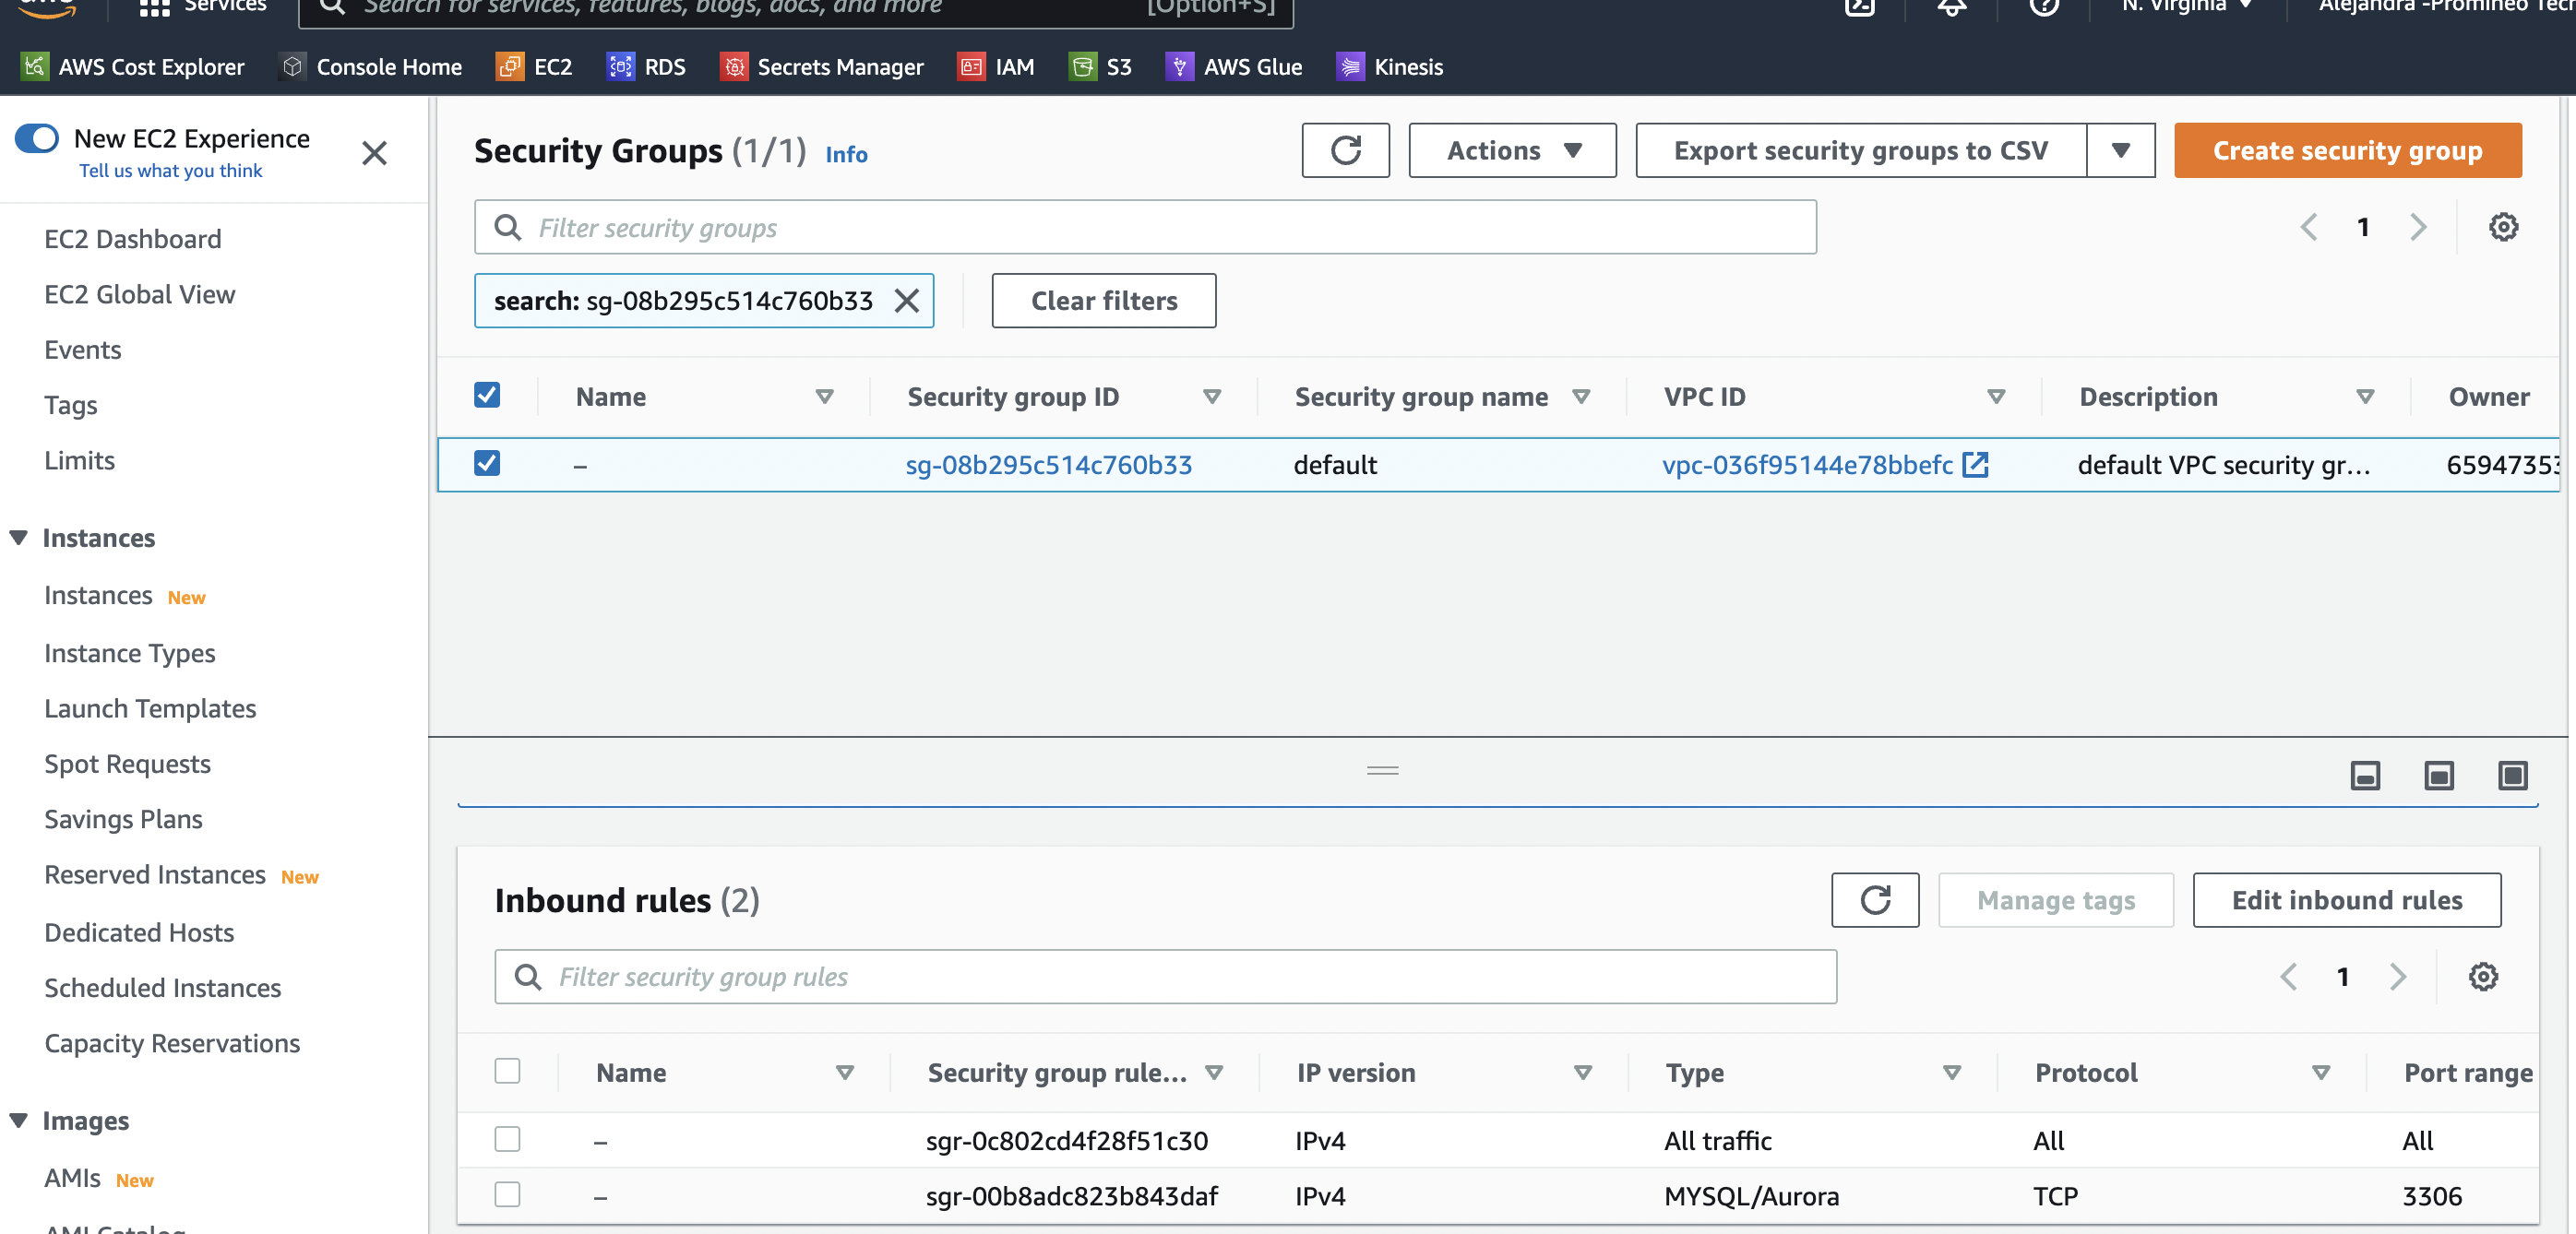


After, used Python to query the database from AWS as shown. Code source is in https://www.w3schools.com/

In [ ]:
## Query data from MySQL database in Python

import mysql.connector ##<--or any mysql-python library

mydb = mysql.connector.connect(
    host="rdsunicorn.chd82pgi4wn1.us-east-1.rds.amazonaws.com",  ##<-endpoint to your database
    user="admin",  ##,<-- user name in AWS RDS database
    password="Capstone22",   ##<-- database password
    database="unicornDB"   ##<-- name of the database (NOT THE IDENTIFIER!)
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM patient;")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

Also, we can reformat the query into a list of dictionaries for each row. In this case, we are showing the 'patient' table. Notice that indexing starts at 1, because we are using the indexing from SQL that starts in 1, not the indexing of Pythin which would start at 0.

In [ ]:
## Querying MySQL RDS columns in a table into a list of dictionaries

import boto3
import mysql.connector
import json

cnx = mysql.connector.connect(user='admin', password='Capstone22',  ##<--- user, password
host='rdsunicorn.chd82pgi4wn1.us-east-1.rds.amazonaws.com', ## <-- endpoint database
                              database='unicornDB')  ##<--<database>

query = "SELECT * FROM patient"

cur = cnx.cursor()
results = cur.execute(query)
rows = cur.fetchall()

# Formatting the Query into a list of dictionaries for each row. In this case my table called 'patient'
# has 8 columns
Rows_lst = []
for i in rows:
    i_dict = {'person_id': i[1], 'first_name': i[2],
              'last_name': i[3], 'email': i[4],
              'dob': i[5], 'address': i[6], 'zip':i[7], 'insurance': i[8]}
    Rows_lst.append(i_dict)

print(i_dict)   

### Ingest data from RDS to S3

To move data from RDS to S3 we utilized Database Migration Service. First we created a Replication instance named unicornz.

Second we created a source and target endpoint, rdsunicorn and unicornt-target7 respectfully.

Finally, we created and sucessfully ran a database migration task called unicorn-herder. This succesfully moved all of our data from RDS to S3.



### Glue Crawler & Athena
Every table was crawled from S3 and listed in a glue database catalog. Data was verified by querying with Athena.


### Lake Formation Process

#### Administraive User 

Per AWS Lake Formation Developer Guide, Administrators should not be Lake Formation Data Lake Administrators. To abide by the guidelines, we creatd a new user group in IAM "LakeAdministrators" and a separate user to manage this microservice. 

### Redshift Cluster
We set up a serverless redshift cluster that conected to our Data Lake. All of our data was linked as an external table and queried sucessfully.